# **Tugas Akhir Kemal**


## Deep Learning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Import Python Package

In [0]:
# tensorflow & keras
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,AveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Input, load_model
from keras.optimizers import Adam,SGD,Adagrad,RMSprop 
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard


#keperluan plot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#Explore data & Directory
import pandas as pd
import numpy as np
import os
from google.colab import files
from google.colab import drive
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
print(tf.__version__)

2.1.0


### Load Dataset


In [0]:
source = '/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/images'

### Explore data gambar

Explore data gambar disini bertujuan untuk mengetahui kode warna dari gmabar dan banyaknya data / kode warna yang ada di suatu gambar (sebagai contoh data yang akan diolah di CNN), Gambar berwarna merupakan perpaduan dari 3 warna primer yaitu red,green, dan blue (RGB). Semua warna RGB diperlukan sebagai input layer pada saat pembangunan model CNN

Text(0.5, 1.0, 'gambar resize')

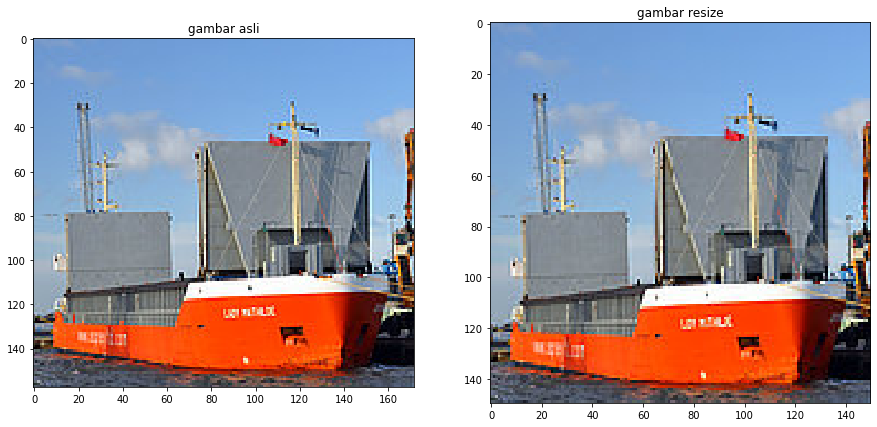

In [0]:
img = Image.open('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/1/2812919.jpg')
imgrez=img.resize((150,150))
fig = plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("gambar asli")
plt.subplot(1,2,2)
plt.imshow(imgrez)
plt.title("gambar resize")

In [0]:
img =mpimg.imread('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/1/2812919.jpg')
print("original image:")
print('Type of the image : ' , type(img))
print('Image size {}'.format(img.size))
print('Shape of the image : {}'.format(img.shape))
print('Image Hight {}'.format(img.shape[0]))
print('Image Width {}'.format(img.shape[1]))
print('Dimension of Image {}'.format(img.ndim))


original image:
Type of the image :  <class 'numpy.ndarray'>
Image size 81528
Shape of the image : (158, 172, 3)
Image Hight 158
Image Width 172
Dimension of Image 3


In [0]:
print('Maximum RGB value in this image {}'.format(img.max()))
print('Minimum RGB value in this image {}'.format(img.min()))

Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [0]:
print("original image:")
print('Value of only R channel {}'.format(img[ 0, 0, 2]))
print('Value of only G channel {}'.format(img[ 0, 0, 1]))
print('Value of only B channel {}'.format(img[ 0, 0, 0]))

original image:
Value of only R channel 201
Value of only G channel 157
Value of only B channel 128


In [0]:
usecols=[0,1,2,3,4]
print('R Channel Only')
redcol=img[ :, :, 2]
np.savetxt("redcol.csv", redcol, delimiter=",")
dfred = pd.read_csv("redcol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfred.head()

R Channel Only


,0,1,2,3,4
0,201,201,200,203,204
1,201,200,201,202,203
2,202,202,200,201,203
3,204,203,202,203,202
4,205,205,205,203,202


In [0]:
print('G Channel Only')
grcol=img[ :, :, 1]
np.savetxt("grcol.csv", grcol, delimiter=",")
dfgreen = pd.read_csv("grcol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfgreen.head()

G Channel Only


,0,1,2,3,4
0,157,157,156,157,157
1,155,155,154,155,156
2,152,152,152,153,155
3,152,151,150,151,152
4,152,151,151,151,150


In [0]:
print('B Channel Only')
blcol=img[ :, :, 0]
np.savetxt("bluecol.csv", blcol, delimiter=",")
dfblue = pd.read_csv("bluecol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfblue.head()

B Channel Only


,0,1,2,3,4
0,128,128,125,126,125
1,124,122,122,123,124
2,116,116,116,119,121
3,112,111,113,114,116
4,109,110,110,111,113


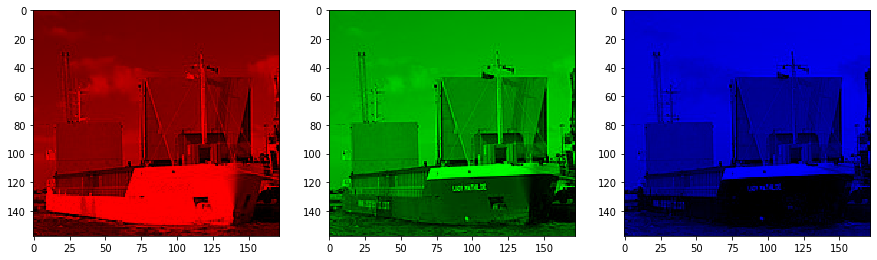

In [0]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = img[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

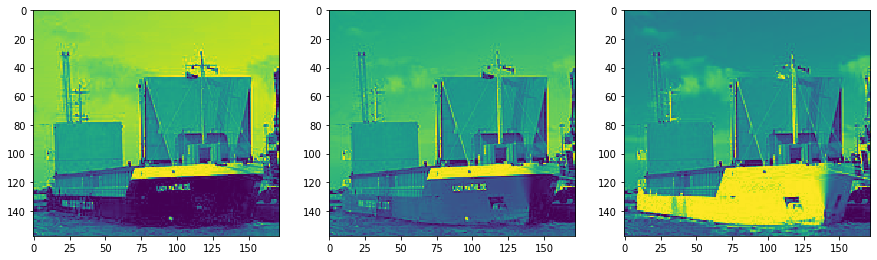

In [0]:
#Contrast dari gambar
fig = plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img[ : , : , 2])
plt.subplot(1,3,2)
plt.imshow(img[ : , : , 1])
plt.subplot(1,3,3)
plt.imshow(img[ : , : , 0])


### Preprocessing data

Split data dengan membagi menjadi training, validasi, test 

Data training: berfungsi untuk melatih model
Data Validasi : berfungsi memvalidasi model
Data test: berfungsi untuk mengetahui seberapa baik model bekerja

In [0]:
train_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/')
val_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/val')
test_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/test')

### Generate data


pada proses ini semua gambar diubah ke dalam array, seperti pada saat explore data, hanya saja dilakukan untuk semua gambar dan secara otomatis

untuk data training, agar memperbanyak data training maka diperlukan manipulasi data dengan data augmentasi, yaitu memodifikasi data dengan berbagai cara seperti merotasi, membalik dan menggeser gambar

In [0]:
image_size = 224 # Semua gambar diubah kedalam 224 * 224
batch_size = 110

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

# Generate data gambar menjadi array
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
                class_mode='sparse')

Found 4001 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1251 images belonging to 5 classes.


### Build Model

Model CNN dilakukan dengan memilih2, karena tidak ada kepastian bagaiman arsitektur model mampu meningkatkan akurasi

## Load Pretrained Model

In [0]:
from keras.applications.vgg16 import VGG16

weights_vgg16 = '/content/drive/My Drive/BUAT TA/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_mobilenet = '/content/drive/My Drive/BUAT TA/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.4_224_no_top.h5'
#base_model_vgg16 = VGG16(weights=weights_vgg16, include_top=False, input_shape=(150,150,3))
# base_model_vgg16 = tf.keras.applications.VGG16(input_shape=(150, 150, 3),
#                                                include_top=False,
#                                                weights=weights_vgg16)

    
# mobilenet_model = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)                          
# mobilenet_model1 = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)
# mobilenet_model2 = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)


VGG16_model = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)
VGG16_model1 = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)
VGG16_model2 = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)
    
    
    #InceptionV3_model = InceptionV3(weights=None, input_shape=(224,224,3),include_top = False)
    #InceptionV3_model.load_weights("/kaggle/input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")

## Menggunakan *fine-tunning* kedalam model

VGG 16

In [0]:
# VGG16_model2.trainable = True
# VGG16_model1.trainable = True

# from_layer = int(len(VGG16_model1.layers)/2)

# for layer in VGG16_model1.layers[:from_layer]:
#     layer.trainable =  False

MobileNet

In [0]:
mobilenet_model2.trainable = True
mobilenet_model1.trainable = True

from_layer = int(len(mobilenet_model1.layers)/2)

for layer in mobilenet_model1.layers[:from_layer]:
    layer.trainable =  False

## Menambahkan FullyConnected Layer

In [0]:
# # MobileNet
x1 = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model.output)
output1 = tf.keras.layers.Dense(5, activation='softmax')(x1)

# # define new model
model = tf.keras.Model(mobilenet_model.inputs, output1)
Model_mobile = tf.keras.Sequential()
Model_mobile.add(model)

x = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model1.output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # define new model
model_x = tf.keras.Model(mobilenet_model1.inputs, output)
Model_mobile1 = tf.keras.Sequential()
Model_mobile1.add(model_x)

x = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model2.output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # define new model
model_x = tf.keras.Model(mobilenet_model2.inputs, output)
Model_mobile2 = tf.keras.Sequential()
Model_mobile2.add(model_x)


# # VGG
# x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model.output)
# output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # define new model

# model_x = tf.keras.Model(VGG16_model.inputs, output)
# Model_vgg = tf.keras.Sequential()
# Model_vgg.add(model_x)

# # VGG
# x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model1.output)
# output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # define new model

# model_x = tf.keras.Model(VGG16_model1.inputs, output)
# Model_vgg1 = tf.keras.Sequential()
# Model_vgg1.add(model_x)

# # VGG
# x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model2.output)
# output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # define new model

# model_x = tf.keras.Model(VGG16_model2.inputs, output)
# Model_vgg2 = tf.keras.Sequential()
# Model_vgg2.add(model_x)

In [0]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
name_mobile = source + "Checkpoint Mobilenet {}.h5".format(int(time.time()))
name_vgg = source + "Checkpoint VGG {}.h5".format(int(time.time()))
cp_mobile = [ModelCheckpoint(name_mobile, monitor='val_acc', save_best_only=True,mode='max', period=1)]
cp_vgg = [ModelCheckpoint(name_vgg, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max',period=1)]
tb_mobile = [keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')]

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

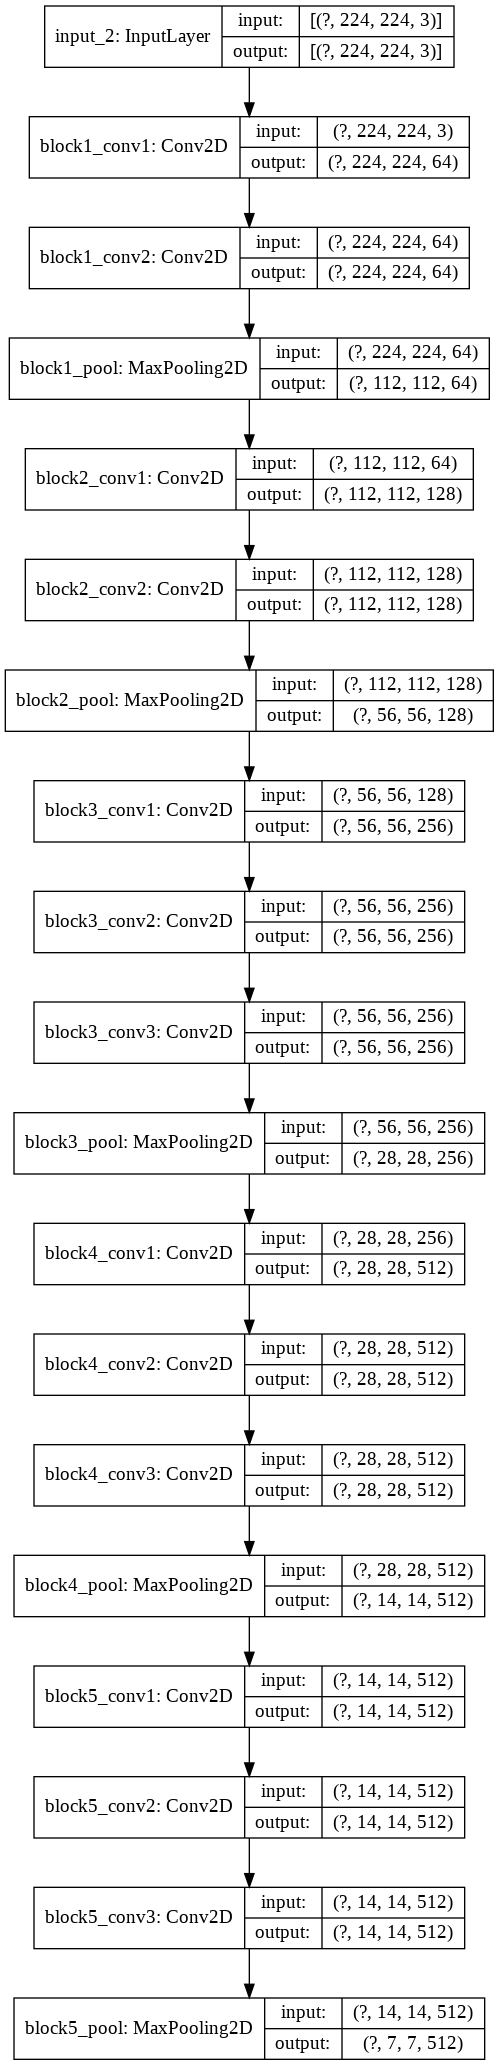

In [0]:
#Plot model
# Model_mobile2.summary()
VGG16_model.summary()
keras.utils.plot_model(VGG16_model, "arsi_mod_mobile.png", show_shapes=True)

In [0]:
# # Plot model
# Model_vgg2.summary()
# keras.utils.plot_model(Model_vgg, "arsi_mod_vgg.png", show_shapes=True)

# Compile

In [0]:
# Model_vgg.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Model_vgg1.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Model_vgg2.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model_mobile.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
Model_mobile1.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
Model_mobile2.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
# compile_vgg = Model_vgg.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)

compile_mobile = Model_mobile.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 10 steps
Epoch 1/10
36/36 [==============================] - 1112s 31s/step - loss: 0.7437 - accuracy: 0.7146 - val_loss: 0.6193 - val_accuracy: 0.7510
Epoch 2/10
36/36 [==============================] - 63s 2s/step - loss: 0.2781 - accuracy: 0.8902 - val_loss: 0.6774 - val_accuracy: 0.7710
Epoch 3/10
36/36 [==============================] - 63s 2s/step - loss: 0.1877 - accuracy: 0.9348 - val_loss: 0.7583 - val_accuracy: 0.7710
Epoch 4/10
36/36 [==============================] - 62s 2s/step - loss: 0.1410 - accuracy: 0.9515 - val_loss: 0.9816 - val_accuracy: 0.7630
Epoch 5/10
36/36 [==============================] - 63s 2s/step - loss: 0.0992 - accuracy: 0.9646 - val_loss: 1.1169 - val_accuracy: 0.7740
Epoch 6/10
36/36 [==============================] - 63s 2s/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.9419 - val_accuracy: 0.8020
Epoch 7/10
36/36 [==============================] - 63s 2s/step -

In [0]:
# compile_vgg1 = Model_vgg1.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)
compile_mobile1 = Model_mobile1.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 10 steps
Epoch 1/10
36/36 [==============================] - 60s 2s/step - loss: 0.7921 - accuracy: 0.7003 - val_loss: 0.8409 - val_accuracy: 0.7250
Epoch 2/10
36/36 [==============================] - 55s 2s/step - loss: 0.3091 - accuracy: 0.8854 - val_loss: 0.7519 - val_accuracy: 0.7470
Epoch 3/10
36/36 [==============================] - 54s 2s/step - loss: 0.2128 - accuracy: 0.9215 - val_loss: 0.8469 - val_accuracy: 0.7360
Epoch 4/10
36/36 [==============================] - 54s 1s/step - loss: 0.1606 - accuracy: 0.9399 - val_loss: 0.7312 - val_accuracy: 0.7650
Epoch 5/10
36/36 [==============================] - 55s 2s/step - loss: 0.1184 - accuracy: 0.9581 - val_loss: 0.6175 - val_accuracy: 0.8000
Epoch 6/10
36/36 [==============================] - 54s 2s/step - loss: 0.0909 - accuracy: 0.9692 - val_loss: 0.5778 - val_accuracy: 0.8150
Epoch 7/10
36/36 [==============================] - 54s 1s/step - lo

In [0]:
# compile_vgg2 = Model_vgg2.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)
compile_mobile2 = Model_mobile2.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 36 steps, validate for 10 steps
Epoch 1/10
36/36 [==============================] - 66s 2s/step - loss: 0.7258 - accuracy: 0.7283 - val_loss: 0.6392 - val_accuracy: 0.7450
Epoch 2/10
36/36 [==============================] - 62s 2s/step - loss: 0.2892 - accuracy: 0.8884 - val_loss: 0.5160 - val_accuracy: 0.8170
Epoch 3/10
36/36 [==============================] - 62s 2s/step - loss: 0.1925 - accuracy: 0.9316 - val_loss: 0.4904 - val_accuracy: 0.8230
Epoch 4/10
36/36 [==============================] - 61s 2s/step - loss: 0.1354 - accuracy: 0.9520 - val_loss: 0.6631 - val_accuracy: 0.8120
Epoch 5/10
36/36 [==============================] - 61s 2s/step - loss: 0.1067 - accuracy: 0.9586 - val_loss: 0.5968 - val_accuracy: 0.8280
Epoch 6/10
36/36 [==============================] - 60s 2s/step - loss: 0.0753 - accuracy: 0.9710 - val_loss: 0.4246 - val_accuracy: 0.8590
Epoch 7/10
36/36 [==============================] - 60s 2s/step - lo

Menyimpan Model

In [0]:
Model_mobile.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 0 {}.h5".format(int(time.time())))
Model_mobile1.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 50 {}.h5".format(int(time.time())))
Model_mobile2.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 100 {}.h5".format(int(time.time())))

# Model_mobile.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 0 {}.h5".format(int(time.time())))
# Model_mobile1.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 50 {}.h5".format(int(time.time())))
# Model_mobile2.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 100 {}.h5".format(int(time.time())))

## Visualisasi Hasil Trainning

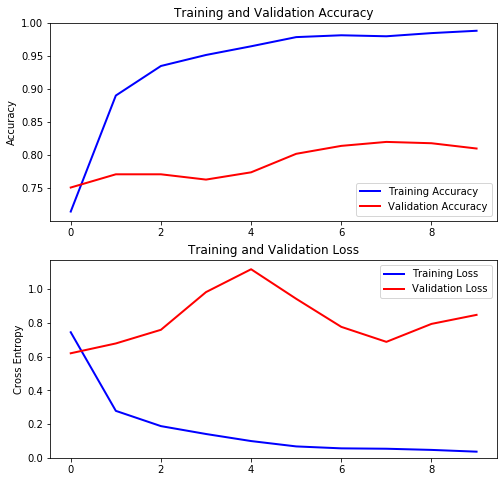

In [0]:
# acc = compile_vgg.history['accuracy']
# val_acc =compile_vgg.history['val_accuracy']
# loss = compile_vgg.history['loss']
# val_loss = compile_vgg.history['val_loss']

acc = compile_mobile.history['accuracy']
val_acc =compile_mobile.history['val_accuracy']
loss = compile_mobile.history['loss']
val_loss = compile_mobile.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

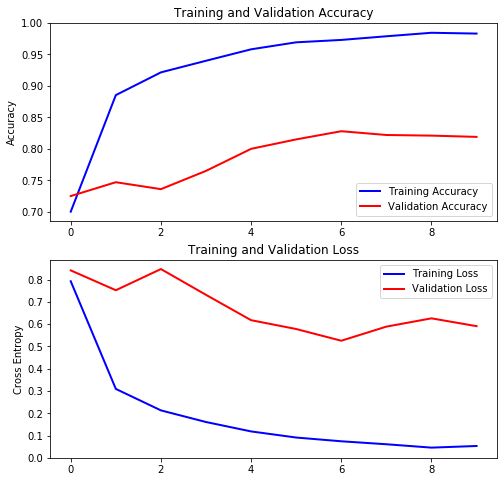

In [0]:
# acc = compile_vgg1.history['accuracy']
# val_acc =compile_vgg1.history['val_accuracy']
# loss = compile_vgg1.history['loss']
# val_loss = compile_vgg1.history['val_loss']

acc = compile_mobile1.history['accuracy']
val_acc =compile_mobile1.history['val_accuracy']
loss = compile_mobile1.history['loss']
val_loss = compile_mobile1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

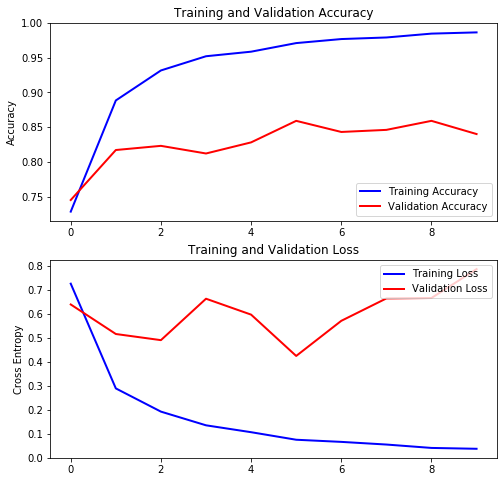

In [0]:
# acc = compile_vgg2.history['accuracy']
# val_acc =compile_vgg2.history['val_accuracy']
# loss = compile_vgg2.history['loss']
# val_loss = compile_vgg2.history['val_loss']

acc = compile_mobile2.history['accuracy']
val_acc =compile_mobile2.history['val_accuracy']
loss = compile_mobile2.history['loss']
val_loss = compile_mobile2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

### Test data: Classification

In [0]:
# # Test data
# Model_vgg.evaluate(test_generator)
# Model_vgg1.evaluate(test_generator)
# Model_vgg2.evaluate(test_generator)

Model_mobile.evaluate(test_generator)
Model_mobile1.evaluate(test_generator)
Model_mobile2.evaluate(test_generator)

  ...
    to  
  ['...']
12/12 [==============================] - 290s 24s/step - loss: 0.8713 - accuracy: 0.8082
  ...
    to  
  ['...']
12/12 [==============================] - 3s 277ms/step - loss: 0.6590 - accuracy: 0.8106
  ...
    to  
  ['...']
12/12 [==============================] - 3s 276ms/step - loss: 0.8125 - accuracy: 0.8425


[0.8124763289039644, 0.84252596]

In [0]:
# pred=Model_vgg.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

pred=Model_mobile.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

              precision    recall  f1-score   support

       Cargo       0.74      0.88      0.80       436
    Military       0.91      0.97      0.94       240
     Carrier       0.72      0.97      0.83       160
      Cruise       0.92      0.96      0.94       159
     Tankers       0.92      0.35      0.50       256

    accuracy                           0.81      1251
   macro avg       0.84      0.82      0.80      1251
weighted avg       0.83      0.81      0.79      1251



Normalized confusion matrix
[[0.88 0.02 0.07 0.01 0.02]
 [0.02 0.97 0.01 0.01 0.  ]
 [0.02 0.01 0.97 0.   0.  ]
 [0.   0.01 0.03 0.96 0.  ]
 [0.51 0.04 0.09 0.02 0.35]]


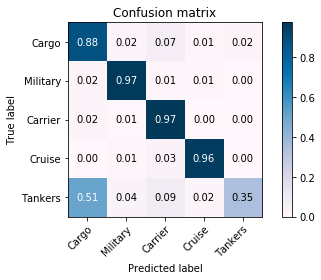

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

In [0]:
# pred=Model_vgg1.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

pred=Model_mobile1.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

              precision    recall  f1-score   support

       Cargo       0.81      0.75      0.77       436
    Military       0.87      0.97      0.92       240
     Carrier       0.84      0.95      0.89       160
      Cruise       0.80      0.99      0.88       159
     Tankers       0.72      0.58      0.64       256

    accuracy                           0.81      1251
   macro avg       0.81      0.85      0.82      1251
weighted avg       0.81      0.81      0.80      1251



Normalized confusion matrix
[[0.75 0.05 0.04 0.04 0.12]
 [0.   0.97 0.   0.02 0.01]
 [0.02 0.01 0.95 0.01 0.01]
 [0.   0.01 0.   0.99 0.01]
 [0.29 0.04 0.04 0.05 0.58]]


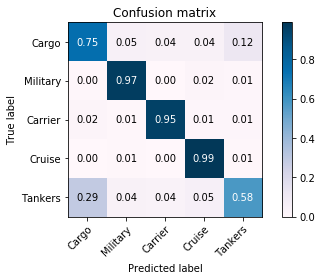

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

In [0]:
# pred=Model_vgg2.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

pred=Model_mobile2.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

              precision    recall  f1-score   support

       Cargo       0.70      0.99      0.82       436
    Military       0.98      0.93      0.96       240
     Carrier       0.97      0.91      0.94       160
      Cruise       0.99      0.92      0.96       159
     Tankers       0.96      0.42      0.58       256

    accuracy                           0.84      1251
   macro avg       0.92      0.83      0.85      1251
weighted avg       0.88      0.84      0.83      1251



Normalized confusion matrix
[[0.99 0.   0.   0.   0.01]
 [0.06 0.93 0.   0.   0.  ]
 [0.08 0.01 0.91 0.   0.  ]
 [0.05 0.01 0.   0.92 0.01]
 [0.57 0.   0.01 0.   0.42]]


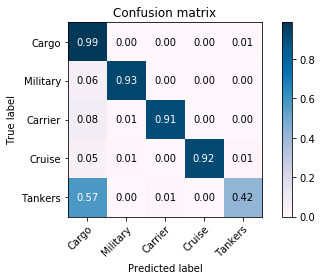

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

### Test Data: Predicting

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model_mobile1.predict(images)
  print(fn)
  print(classes)

MessageError: ignored

In [0]:
%tensorboard --logdir='/content/logs'